In [26]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
# display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

# dataset  = pd.read_csv("ml_assi1.csv")
# plt.scatter( dataset.iloc[:,0] , dataset.iloc[:,1])
# plt.show()

my_data = np.genfromtxt('data.csv', delimiter=',') # read the data
X = my_data[:, 0].reshape(-1,1) # -1 tells numpy to figure out the dimension by itself
ones = np.ones([X.shape[0], 1]) # create a array containing only ones 
X = np.concatenate([ones, X],1) # cocatenate the ones to X matrix
y = my_data[:, 1].reshape(-1,1) # create the y matrix


## 1 array for bias

array([[ 1., 10.],
       [ 1.,  9.],
       [ 1.,  2.],
       [ 1., 15.],
       [ 1., 10.],
       [ 1., 16.],
       [ 1., 11.],
       [ 1., 16.]])

In [21]:
### hyperparameters
alpha = 0.0001
iters = 1000

# 1 attribute (X) 
# 2 initial ramdom values (one bias) m and c | y = mx+c
theta = np.array([[1.0, 1.0]])

In [25]:
# Slope : The amount that y increases as x increases some amoun

def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all arrays to matrices
    return np.sum(inner) / (2 * len(X))

computeCost(X, y, theta)



1708.125

In [28]:
def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
#         if i % 10 == 0: # just look at cost every ten loops for debugging
#             print(cost)
    return (theta, cost)

g, cost = gradientDescent(X, y, theta, alpha, iters)  
print(g, cost)

## g : parameters ans
## cost  : least cost

[[1.49628401 5.45209728]] 267.22470244578153


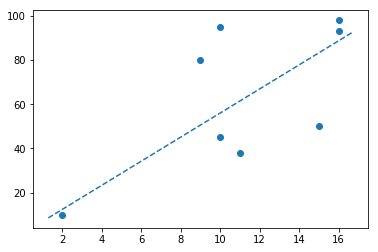

In [24]:
plt.scatter(my_data[:, 0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation
plt.plot(x_vals, y_vals, '--')